WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count

len(cities)

614

In [12]:
# Set up counter for record printing
city_counter = 0
set_counter = 1

# Set up lists to hold reponse info
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date= []
cities_clean = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Loop through list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    #print (json.dumps(response,indent=2))
    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

        # Set up counter for record processing
        print(f'Processing Record {city_counter} of Set {set_counter} | {city}')
        city_counter = city_counter + 1
        if city_counter == 51:
            city_counter = 0
            set_counter = set_counter + 1
        
        cities_clean.append(city)
        
        
    except KeyError:
        print(f'Missing data for {city}. Skipping...')
        
        
print('------------------------------')
print('End of Records')
print('------------------------------')


Processing Record 0 of Set 1 | upernavik
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | calabozo
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | port hardy
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | saint-pierre
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | mehamn
Processing Record 12 of Set 1 | yuli
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | baykit
Processing Record 16 of Set 1 | amapa
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | arraial do cabo
Processing Record 

Processing Record 30 of Set 4 | new norfolk
Processing Record 31 of Set 4 | half moon bay
Processing Record 32 of Set 4 | road town
Processing Record 33 of Set 4 | ayan
Processing Record 34 of Set 4 | kaitangata
Processing Record 35 of Set 4 | kununurra
Processing Record 36 of Set 4 | airai
Processing Record 37 of Set 4 | vuktyl
Processing Record 38 of Set 4 | obilnoye
Processing Record 39 of Set 4 | touros
Processing Record 40 of Set 4 | carnarvon
Processing Record 41 of Set 4 | manzil kamil
Processing Record 42 of Set 4 | macae
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | vallenar
Processing Record 45 of Set 4 | tasiilaq
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | stephenville
Processing Record 48 of Set 4 | maltahohe
Processing Record 49 of Set 4 | tautira
Processing Record 50 of Set 4 | kovdor
Processing Record 0 of Set 5 | badovinci
Missing data for samusu. Skipping...
Processing Record 1 of Set 5 | saint anthony
Processing Re

Processing Record 15 of Set 8 | praia da vitoria
Processing Record 16 of Set 8 | rorvik
Processing Record 17 of Set 8 | fairview
Processing Record 18 of Set 8 | kerchevskiy
Processing Record 19 of Set 8 | viet tri
Processing Record 20 of Set 8 | zyryanka
Processing Record 21 of Set 8 | kushiro
Processing Record 22 of Set 8 | terrace
Processing Record 23 of Set 8 | mandera
Processing Record 24 of Set 8 | calamar
Processing Record 25 of Set 8 | cherskiy
Processing Record 26 of Set 8 | adana
Processing Record 27 of Set 8 | lakhipur
Processing Record 28 of Set 8 | margate
Processing Record 29 of Set 8 | saint-joseph
Processing Record 30 of Set 8 | yar
Processing Record 31 of Set 8 | qaqortoq
Processing Record 32 of Set 8 | terekli-mekteb
Processing Record 33 of Set 8 | narsaq
Missing data for sedelnikovo. Skipping...
Processing Record 34 of Set 8 | ugoofaaru
Processing Record 35 of Set 8 | wanaka
Processing Record 36 of Set 8 | khasan
Processing Record 37 of Set 8 | tuy hoa
Processing Reco

Processing Record 37 of Set 11 | igarka
Processing Record 38 of Set 11 | port lincoln
Processing Record 39 of Set 11 | ballina
Processing Record 40 of Set 11 | yumen
Processing Record 41 of Set 11 | zambezi
Processing Record 42 of Set 11 | porto novo
Processing Record 43 of Set 11 | namtsy
Processing Record 44 of Set 11 | acajutla
Missing data for artyk. Skipping...
Processing Record 45 of Set 11 | santa maria ixhuatan
Processing Record 46 of Set 11 | quelimane
Processing Record 47 of Set 11 | linqing
Processing Record 48 of Set 11 | glyadyanskoye
Processing Record 49 of Set 11 | biltine
Processing Record 50 of Set 11 | vryburg
Processing Record 0 of Set 12 | callaway
Processing Record 1 of Set 12 | mvangue
Processing Record 2 of Set 12 | marrakesh
------------------------------
End of Records
------------------------------


Convert Raw Data to DataFrame

In [ ]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cities_clean,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

In [14]:
# Export the city data into a .csv.
weather_data.to_csv("output_data/weather_data.csv")

In [15]:
# Inspect the data and remove the cities where the humidity > 100%
# Skip this stepif there are no cities that have humidity > 100%
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,19.044670,18.690619,15.624770,70.299645,52.801418,3.385426,1.619234e+09
std,33.535293,89.674747,10.470462,22.027851,38.669703,2.320928,1.189259e+02
min,-54.800000,-175.200000,-12.000000,8.000000,0.000000,0.150000,1.619233e+09
25%,-9.923725,-59.683325,7.220000,58.000000,12.000000,1.647500,1.619234e+09
50%,23.539300,22.726300,16.000000,74.000000,56.000000,2.865000,1.619234e+09
75%,47.668450,96.270850,24.875000,88.000000,90.000000,4.622500,1.619234e+09
max,78.218600,178.416700,35.450000,100.000000,100.000000,14.840000,1.619234e+09


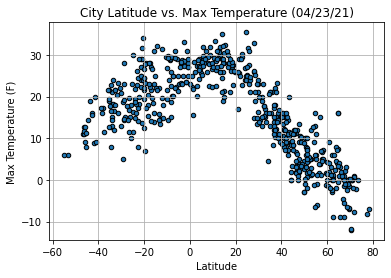

In [34]:
# Plot Latitude vs. Temperature

# Create scatter plot
weather_data.plot.scatter("Lat", "Max Temp", marker="o", edgecolors="black")

#Add Grid
plt.grid()

#Add Labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (04/23/21)")

# Save Plot
plt.savefig('Lat_Temp.png')

#Show Plot
plt.show()

Scatter plot is modeling the relationship between a city's latitude and max temperature. Cities grow warmer as they near the equator.

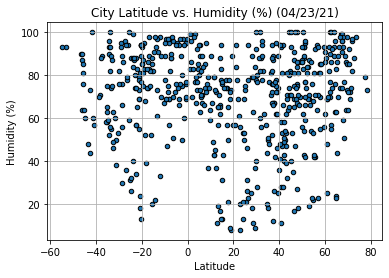

In [36]:
# Plot Latitude vs. Humidity

# Create scatter plot
weather_data.plot.scatter("Lat", "Humidity", marker="o", edgecolors="black")

#Add Grid
plt.grid()

#Add Labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) (04/23/21)")

# Save Plot
plt.savefig('Lat_Humidity.png')

#Show Plot
plt.show()

Scatter plot is modeling the relationship between a city's latitude and humidity (%). There's no relationship between a city's location and humidity %. 

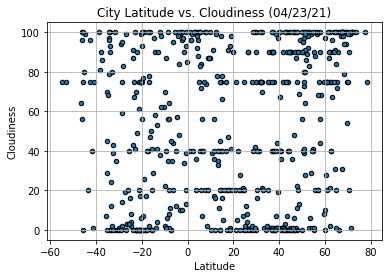

In [37]:
# Plot Latitude vs. Cloudiness

# Create scatter plot
weather_data.plot.scatter("Lat", "Cloudiness", marker="o", edgecolors="black")

#Add Grid
plt.grid()

#Add Labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (04/23/21)")

# Save Plot
plt.savefig('Lat_Cloudiness.png')

#Show Plot
plt.show()

Scatter plot is modeling the relationship between a city's latitude and cloudiness. There's no relationship between a city's location and cloudiness.

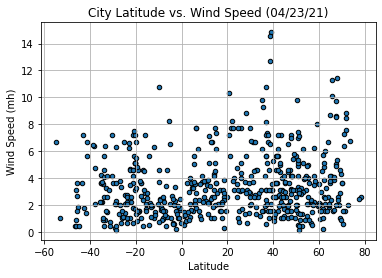

In [38]:
# Plot Latitude vs. Wind Speed

# Create scatter plot
weather_data.plot.scatter("Lat", "Wind Speed", marker="o", edgecolors="black")

#Add Grid
plt.grid()

#Add Labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mh)")
plt.title("City Latitude vs. Wind Speed (04/23/21)")

# Save Plot
plt.savefig('Lat_Wind.png')

#Show Plot
plt.show()

Scatter plot is modeling the relationship between a city's latitude and cloudiness. There's no relationship between city's location and wind speed.

Linear Regression

In [21]:
# Create a groupby for Northern Hemisphere (greater than or equal to 0 degrees latitude)
# and Southern Hemisphere (less than 0 degrees latitude)

n_hemisphere = weather_data[weather_data["Lat"] >= 0]

s_hemisphere = weather_data[weather_data["Lat"] < 0]


The r-value is: 0.8157355128799713


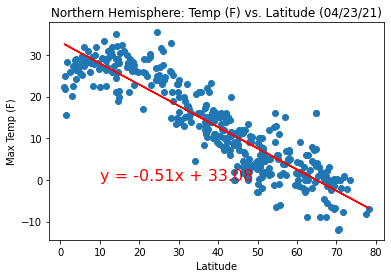

In [42]:
# Plot Linear Regression - Northern Hemisphere - Temperature (F) vs. Latitude
            
# Assign x & y values
x_values = (n_hemisphere["Lat"])
y_values = (n_hemisphere["Max Temp"])

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=16,color="red")

# Print Correlation Coefficient
print(f"The r-value is: {rvalue**2}")

#Add Labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere: Temp (F) vs. Latitude (04/23/21)")

#Show Plot
plt.show()

The r-value is: 0.38579586690526074


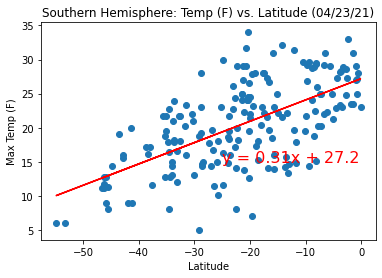

In [41]:
# Plot Linear Regression - Southern Hemisphere - Temperature (F) vs. Latitude

# Assign x & y values
x_values = (s_hemisphere["Lat"])
y_values = (s_hemisphere["Max Temp"])

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,15),fontsize=16,color="red")

# Print Correlation Coefficient
print(f"The r-value is: {rvalue**2}")

#Add Labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere: Temp (F) vs. Latitude (04/23/21)")

#Show Plot
plt.show()


In the Northern Hemisphere, there's a strong correlation between a city's latitude and its temperature; the closer the city is to the equator, the higher the temp rises. For cities located in the Southern Hemisphere, r-value (0.386) suggests there is a moderate relationship between the city's latitude and temperature.

The r-value is: 0.022011618403573713


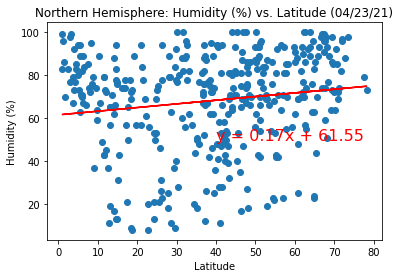

In [43]:
# Plot Linear Regression - Northern Hemisphere - Humidity (%) vs. Latitude

# Assign x & y values
x_values = (n_hemisphere["Lat"])
y_values = (n_hemisphere["Humidity"])

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=16,color="red")

# Print Correlation Coefficient
print(f"The r-value is: {rvalue**2}")

#Add Labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude (04/23/21)")

#Show Plot
plt.show()

The r-value is: 0.013208875238682541


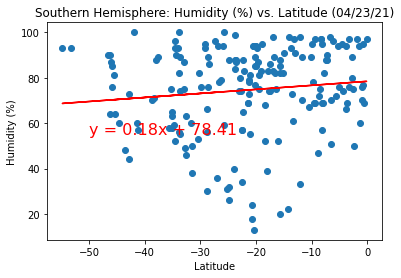

In [44]:
# Plot Linear Regression - Southern Hemisphere - Humidity (%) vs. Latitude

# Assign x & y values
x_values = (s_hemisphere["Lat"])
y_values = (s_hemisphere["Humidity"])

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=16,color="red")

# Print Correlation Coefficient
print(f"The r-value is: {rvalue**2}")

#Add Labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude (04/23/21)")

#Show Plot
plt.show()

For both the Northern and Southern Hemisphere, the r-value shows there is no relationship for a city's location and its humidity (%).

The r-value is: 0.03471252224897227


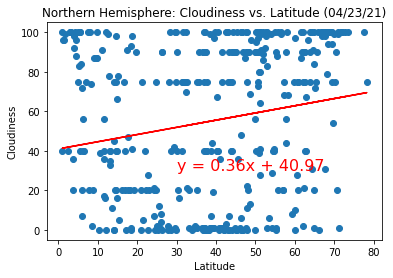

In [45]:
# Plot Linear Regression - Northern Hemisphere - Cloudiness vs. Latitude

# Assign x & y values
x_values = (n_hemisphere["Lat"])
y_values = (n_hemisphere["Cloudiness"])

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=16,color="red")

# Print Correlation Coefficient
print(f"The r-value is: {rvalue**2}")

#Add Labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude (04/23/21)")

#Show Plot
plt.show()

The r-value is: 0.001888070244300723


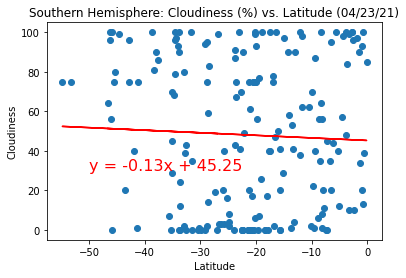

In [46]:
# Plot Linear Regression - Southern Hemisphere - Cloudiness vs. Latitude

# Assign x & y values
x_values = (s_hemisphere["Lat"])
y_values = (s_hemisphere["Cloudiness"])

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=16,color="red")

# Print Correlation Coefficient
print(f"The r-value is: {rvalue**2}")

#Add Labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude (04/23/21)")

#Show Plot
plt.show()

For both the Northern and Southern Hemisphere, the r-value shows there is no relationship for a city's location and its cloudiness.

The r-value is: 0.005367795111841969


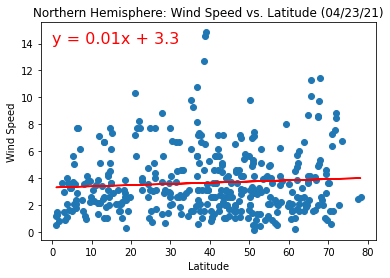

In [47]:
# Plot Linear Regression - Northern Hemisphere - Wind Speed (mph) vs. Latitude

# Assign x & y values
x_values = (n_hemisphere["Lat"])
y_values = (n_hemisphere["Wind Speed"])

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,14),fontsize=16,color="red")

# Print Correlation Coefficient
print(f"The r-value is: {rvalue**2}")

#Add Labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude (04/23/21)")

#Show Plot
plt.show()

The r-value is: 0.020146377889672395


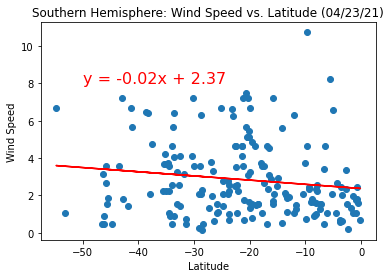

In [48]:
# Plot Linear Regression - Southern Hemisphere - Wind Speed (mph) vs. Latitude

# Assign x & y values
x_values = (s_hemisphere["Lat"])
y_values = (s_hemisphere["Wind Speed"])

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=16,color="red")

# Print Correlation Coefficient
print(f"The r-value is: {rvalue**2}")

#Add Labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude (04/23/21)")

#Show Plot
plt.show()

For both the Northern and Southern Hemisphere, the r-value shows there is no relationship for a city's location and its wind speed (mph).